# Course: Application of AI, Data Science and Machine Learning
# Lab 5: Social Network Analysis

## Q1. Load the Karate Club (Zachary’s Karate Club) data from Python and display the graph like following: 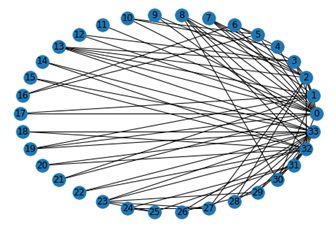

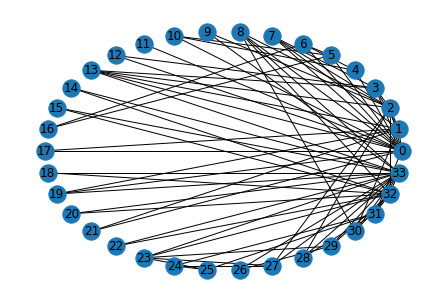

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community 


G = nx.karate_club_graph()

nx.draw_circular(G, with_labels=True)
plt.show()

## Q2. Calculate page rank of each node using the network obtained in Q1.?



In [2]:
pr = nx.pagerank(G, alpha=0.5)
prval = pr.values()
print('No of Nodes = ', len(prval))
print('Page Rank: = ', prval)

No of Nodes =  34
Page Rank: =  dict_values([0.07640439414061907, 0.0443211423629843, 0.04502041660333677, 0.03250874308536558, 0.025119599948944953, 0.030715816135582382, 0.030715816135582382, 0.024515796502047386, 0.027234658864986203, 0.01930900971209646, 0.025119599948944953, 0.017093485952766153, 0.019802541005683405, 0.02686791318323282, 0.019509136438037956, 0.019509136438037956, 0.02238487906135158, 0.019555730771160282, 0.019509136438037956, 0.021907847452345718, 0.019509136438037956, 0.019555730771160282, 0.019509136438037956, 0.03040434195627298, 0.02496350356885464, 0.024729238832229633, 0.020517913913273022, 0.026510035614560064, 0.02213134028892131, 0.027679108218708306, 0.024694883644531998, 0.033867382873406765, 0.05882903433693859, 0.07997441292392223])


## Q3. Plot change in page rank for different values of alpha, Like following: 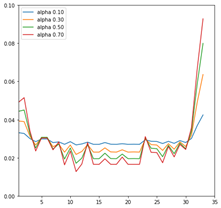 

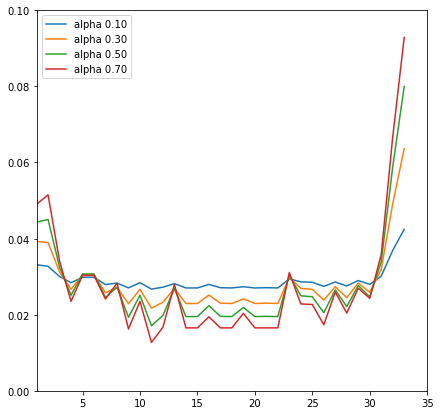

In [3]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

#set the alpha values
alphas = np.arange(0.1, 0.9, 0.2)
#calculate the page rank
for alp in alphas:
    #print('Alpha=', alp)
    pr = nx.pagerank(G, alpha=alp)
    prval = pr.values()
    
    # The page rank values are in a dictionay , hence, we need to convert it into list
    list_prval =np.array(list(pr.values())).astype(float)
    plt.ylim(0, 0.10)
    plt.xlim(1,35)
    ax.plot( list_prval, label='alpha {0:.2f}'.format(alp)) 
    #print('prval = ', prval)

ax.legend()

#print('list=', list_prval)

## Q4. Make a network like following using Python?
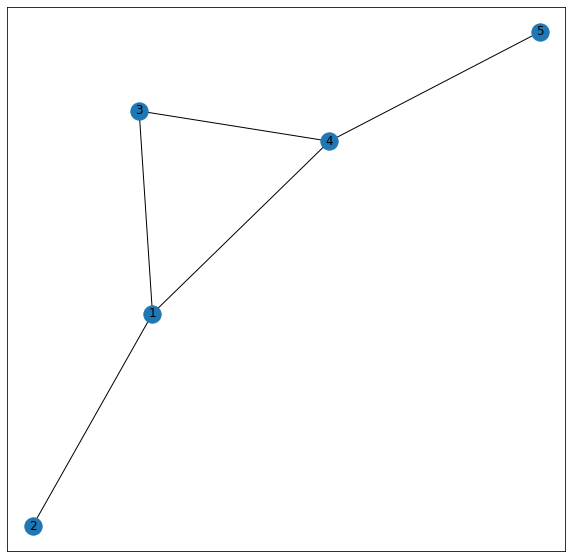

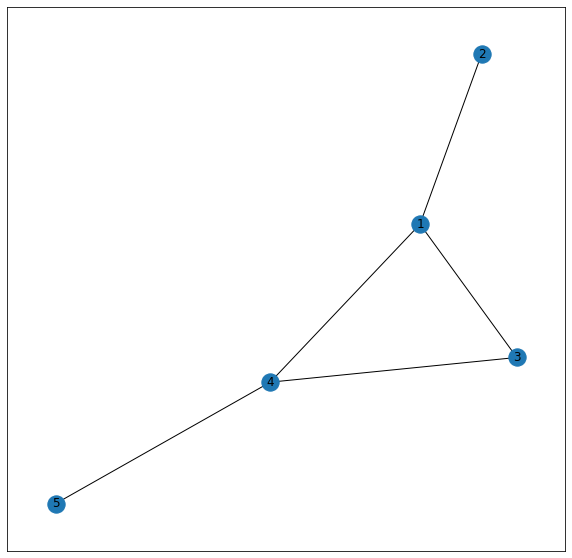

In [7]:
import networkx as nx 
import matplotlib.pyplot as plt 
  
G = nx.Graph() 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (4, 5)]) 
  
plt.figure(figsize =(10, 10)) 
nx.draw_networkx(G, with_labels = True)

# Q5.Using the above graph, find more links using Triadic Closure?

In [8]:
import networkx as nx 
  
G = nx.Graph() 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (4, 5)]) 
e = list(G.edges()) 
  
def triadic(e): 
  new_edges = [] 
  
  for i in e: 
    a, b = i 
  
    for j in e: 
      x, y = j 
  
      if i != j: 
        if a == x and (b, y) not in e and (y, b) not in e: 
          new_edges.append((b, y)) 
        if a == y and (b, x) not in e and (x, b) not in e: 
          new_edges.append((b, x)) 
        if b == x and (a, y) not in e and (y, a) not in e: 
          new_edges.append((a, y)) 
        if b == y and (a, x) not in e and (x, a) not in e: 
          new_edges.append((a, x)) 
  
  return new_edges 
  
print("The possible new edges according to Triadic closure are :") 
print(triadic(e)) 

The possible new edges according to Triadic closure are :
[(2, 3), (2, 4), (3, 2), (4, 2), (1, 5), (3, 5), (5, 1), (5, 3)]


# Q6.Using the above graph, find more links using Jaccard Coefficient?

In [9]:
import networkx as nx 
  
G = nx.Graph() 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (4, 5)]) 
  
print(list(nx.jaccard_coefficient(G)) )

[(1, 5, 0.3333333333333333), (2, 3, 0.5), (2, 4, 0.3333333333333333), (2, 5, 0.0), (3, 5, 0.5)]


# Q7. Using the above graph, find more links using Resource Allocation Index?

In [10]:
import networkx as nx 
  
G = nx.Graph() 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (4, 5)]) 
  
print(list(nx.resource_allocation_index(G)))

[(1, 5, 0.3333333333333333), (2, 3, 0.3333333333333333), (2, 4, 0.3333333333333333), (2, 5, 0), (3, 5, 0.3333333333333333)]


# Q8. Using the above graph, find more links using Adamic Adar Index?

In [12]:
import networkx as nx 
  
G = nx.Graph() 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (4, 5)]) 
  
print(list(nx.adamic_adar_index(G)))

[(1, 5, 0.9102392266268373), (2, 3, 0.9102392266268373), (2, 4, 0.9102392266268373), (2, 5, 0), (3, 5, 0.9102392266268373)]


# Q9.Using the above graph, find more links using Preferential Attachment?

In [13]:
import networkx as nx 
  
G = nx.Graph() 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (4, 5)]) 
  
print(list(nx.preferential_attachment(G))) 

[(1, 5, 3), (2, 3, 2), (2, 4, 3), (2, 5, 1), (3, 5, 2)]


# Q10. Create a small random network, assign communities to it and find links using Community Common Neighbor?

[('C', 'E', 1), ('C', 'I', 0), ('C', 'A', 4), ('C', 'H', 0), ('C', 'G', 1), ('D', 'E', 1), ('D', 'I', 0), ('D', 'F', 1), ('D', 'H', 0), ('D', 'B', 4), ('D', 'G', 0), ('E', 'H', 2), ('E', 'B', 1), ('E', 'I', 2), ('I', 'H', 2), ('I', 'A', 0), ('I', 'B', 0), ('I', 'F', 2), ('F', 'H', 2), ('F', 'A', 1), ('F', 'B', 1), ('A', 'H', 0), ('A', 'G', 1), ('H', 'B', 0), ('B', 'G', 0)]


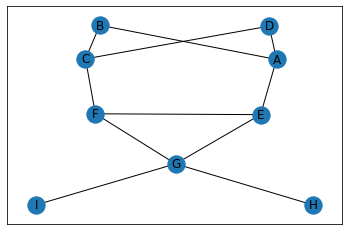

In [14]:
import networkx as nx 
import matplotlib.pyplot as plt 
  
G = nx.Graph() 
G.add_node('A', community = 0) 
G.add_node('B', community = 0) 
G.add_node('C', community = 0) 
G.add_node('D', community = 0) 
G.add_node('E', community = 1) 
G.add_node('F', community = 1) 
G.add_node('G', community = 1) 
G.add_node('H', community = 1) 
G.add_node('I', community = 1) 
  
G.add_edges_from([('A', 'B'), ('A', 'D'), ('A', 'E'), ('B', 'C'), 
                  ('C', 'D'), ('C', 'F'), ('E', 'F'), ('E', 'G'),  
                             ('F', 'G'), ('G', 'H'), ('G', 'I')]) 
  
nx.draw_networkx(G) 
print(list(nx.cn_soundarajan_hopcroft(G))) 

# code credit:
### Page Rank:  https://nbviewer.jupyter.org/github/shestakoff/social_ntwks/blob/master/page_rank_hits.ipynb

### social network: https://www.geeksforgeeks.org/link-prediction-predict-edges-in-a-network-using-networkx/

### More details and questions related to page rank
https://faculty.math.illinois.edu/~riveraq2/teaching/simcamp16/PageRankwithPython.html

#### complete ml based recommender for interested student?
https://github.com/iamsinghrajat/Friends-Recommender-In-Social-Network/blob/master/LinkPredictionInSocialNetwork.py

